# In Class Exercise 5: Systems of Linear Equations

Robin: Driver -- Jason: Navigator

1a) Write the Force equations using matrix equation of the form $ F = \hat{K}x - b$
$
F_1 = −k_1(x_1 − L_1) + k_2(x_2 − x_1 −L_2) \\
F_2 = −k_2(x_2 − x_1 − L_2) + k_3(x_3 − x_2 −L_3)\\
F_3 = −k_3(x_3 − x_2 − L_3) + k_4(L_w − x_3 −L_4)\\
$
Solving on paper, we get the following for $\hat{K}$ and $b$:

$$
\hat{K}=
\begin{bmatrix}
-(k_1+k_2) & k_2 & 0\\
k_2 & -(k_2+k_3) & k_3\\
0 & k_3 & -(k_3 + k_4)
\end{bmatrix}
\mbox{ and }
b =
-\begin{bmatrix}
k_1L_1 - k_2L_2 \\
k_2L_2 - k_3L_3 \\
k_3L_3 +k_4L_W-k_4L_4
\end{bmatrix}
$$

2a) Write a program to solve for the rest positions of the masses in equilibrium and the final lengths of the springs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ksolver(k, l, l_w):
    '''ksolver takes in 
    k - a vector of size 4, with each index the spring constant of each spring in the system
    l - a vector of size 4, with each index the unstretched length of each spring
    l_w - the distance of the entire system from wall to wall'''
    
    # Matrix that maps the spring constants to the x vector in K*x = b eqn
    bigK = np.array([
        [-(k[0] + k[1]), k[1], 0],
        [k[1], -(k[1] + k[2]), k[2]],
        [0, k[2], -(k[2] + k[3])]
    ])

    # matrix b of constants for K*x = b eqn
    b = -np.array([
         k[0] * l[0] - k[1] * l[1],
         k[1] * l[1] - k[2] * l[2],
         k[2] * l[2] + k[3] * l_w - k[3] * l[3]
    ])

    # take the inverse of the matrix K to solve for x
    invk = np.linalg.inv(bigK)
    
    # the x vector of positions
    xs = invk @ b

    springlengths = np.array([xs[0], xs[1]-xs[0], xs[2]-xs[1], l_w-xs[2]])

    return xs, springlengths

In [2]:
k_a = np.array([1, 2, 3, 4])
k_b = k_a.copy() # copy for supposed runtime performance
k_c = np.array([1, 1, 1, 1])
k_d = np.array([1, 1, 1, 0])
k_e = np.array([0, 1, 1, 0])

L_a = k_c.copy()
L_b = L_a.copy()
L_c = np.array([2, 2, 1, 1])
L_d = L_c.copy()
L_e = L_c.copy()

L_w_a = 4
L_w_b = 10
L_w_c = L_w_a
L_w_d = L_w_a
L_w_e = L_w_a

xA, lengthsA = ksolver(k_a, L_a, L_w_a)
xB, lengthsB = ksolver(k_b, L_b, L_w_b)
xC, lengthsC = ksolver(k_c, L_c, L_w_c)
xD, lengthsD = ksolver(k_d, L_d, L_w_d)
# xE, lengthsE = ksolver(k_e, L_e, L_w_e)

print(f'a) Mass positions - {xA}, spring lengths - {lengthsA} ')
print(f'b) Mass positions - {xB}, spring lengths - {lengthsB} ')
print(f'c) Mass positions - {xC}, spring lengths - {lengthsC} ') 
print(f'd) Mass positions - {xD}, spring lengths - {lengthsD} ') # note that these answers are physically unreasonable
# print(f'e) Mass positions - {xE}, spring lengths - {lengthsE} ') -- part e will not work because the matrix is singular

a) Mass positions - [1. 2. 3.], spring lengths - [1. 1. 1. 1.] 
b) Mass positions - [3.88 6.32 8.28], spring lengths - [3.88 2.44 1.96 1.72] 
c) Mass positions - [1.5 3.  3.5], spring lengths - [1.5 1.5 0.5 0.5] 
d) Mass positions - [2. 4. 5.], spring lengths - [ 2.  2.  1. -1.] 


4. Challenge Question:
$F_{rw} = −k_4(L_w − x_3 − L_4)$

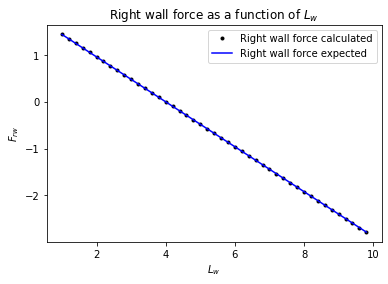

In [3]:
def ksolverF(k, l, l_w):
    '''ksolver takes in 
    k - a vector of size 4, with each index the spring constant of each spring in the system
    l - a vector of size 4, with each index the unstretched length of each spring
    l_w - the distance of the entire system from wall to wall'''
    
    # Matrix that maps the spring constants to the x vector in K*x = b eqn
    bigK = np.array([
        [-(k[0] + k[1]), k[1], 0],
        [k[1], -(k[1] + k[2]), k[2]],
        [0, k[2], -(k[2]+k[3])]
    ])

    # matrix b of constants for K*x = b eqn
    b = -np.array([
         k[0] * l[0] - k[1] * l[1],
         k[1] * l[1] - k[2] * l[2],
         k[2] * l[2] + k[3] * l_w - k[3] * l[3]
    ])

    invk = np.linalg.inv(bigK)
    xs = invk @ b

    springlengths = np.array([xs[0], xs[1] - xs[0], xs[2] - xs[1], l_w - xs[2]])
    
    # Expression of Force on the right wall from problem 
    F_rw = -k[3] * (l_w - xs[2] - l[3])
    
    # quantities used to verify Law of Equivalent springs
    L_0 = np.sum(l)
    k_0 = 1/(1/k[0] + 1/k[1] + 1/k[2] + 1/k[3])

    # Expresssion of Law of Equivalent springs
    F_equiv = -k_0 * (l_w - L_0)

    return F_rw, F_equiv

# want a function of L_{w}
lwsArray = np.arange(1, 10, 0.2)
Fs = np.empty(lwsArray.shape)
Fq = np.empty(lwsArray.shape)

for i, lw in enumerate(lwsArray):
    Fs[i], Fq[i]= ksolverF(k_a, L_a, lw)

plt.figure()
plt.plot(lwsArray, Fs, 'k.', label = 'Right wall force calculated')
plt.plot(lwsArray, Fq, 'b-', label = 'Right wall force expected')
plt.ylabel('$F_{rw}$')
plt.xlabel('$L_{w}$')
plt.legend()
plt.title('Right wall force as a function of $L_w$')
plt.show()
